#  2025W AI and ML Capstone Project

# Group E. Loan Decision Making using Explainable AI

 ## Aparna Suresh (C0928056) 
 ## Erwin Jimenez (C0924257 )
 ##  Karun Kumar Atreya (C0917245) 
 ## Saugat Babu Bhattarai (C0916109 )



pip install xgboost


pip install catboost

In [5]:
# conda install --force-reinstall pandas

In [6]:
# conda install conda=25.1.1

In [7]:
# Loan Decision AI with Explainability
# Install required packages: pip install xgboost catboost shap lime pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from catboost import CatBoostClassifier
import shap
from lime.lime_tabular import LimeTabularExplainer

import matplotlib.pyplot as plt
import seaborn as sns



print("Libraries imported successfully!")








Libraries imported successfully!


In [8]:

# ----------------------
# 1. Data Preparation
# ----------------------
# Load dataset (replace with your loan data)
data = pd.read_csv('loantrain.csv')  # Should contain features like income, credit score, etc.
# Sample dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

data

/var/folders/wy/9jmlfhzn7bj4hf4ltxyqmz8c0000gn/T/ipykernel_35482/715837141.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loantrain.csv')  # Should contain features like income, credit score, etc.


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [9]:

# 1. Drop 'Name' column
data.drop(columns=['ID','Customer_ID'], inplace=True)

In [10]:
data.isnull().sum()

Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
columns_to_convert = [
    "Annual_Income",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Amount_invested_monthly",
    "Monthly_Balance"
]

# Replace non-numeric characters and empty strings with NaN, then convert to float
data[columns_to_convert] = (
    data[columns_to_convert]
    .replace('[^\d.]', '', regex=True)  # Remove unwanted characters
    .replace('', np.nan)  # Replace empty strings with NaN
    .astype(float)  # Convert to float
)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Name                      90015 non-null   object 
 2   Age                       100000 non-null  object 
 3   SSN                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    92998 non-null   ob

In [13]:
columns_to_convert = ["Age", "Num_of_Loan", "Num_of_Delayed_Payment"]

# Convert to numeric, forcing errors to NaN if conversion fails
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Name                      90015 non-null   object 
 2   Age                       95061 non-null   float64
 3   SSN                       100000 non-null  object 
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     84998 non-null   float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               95215 non-null   float64
 11  Type_of_Loan              88592 non-null   object 
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    90254 non-null   fl

In [15]:
num_data = data.select_dtypes(include=['number','float'])
cat_data = data.select_dtypes(include=['object'])

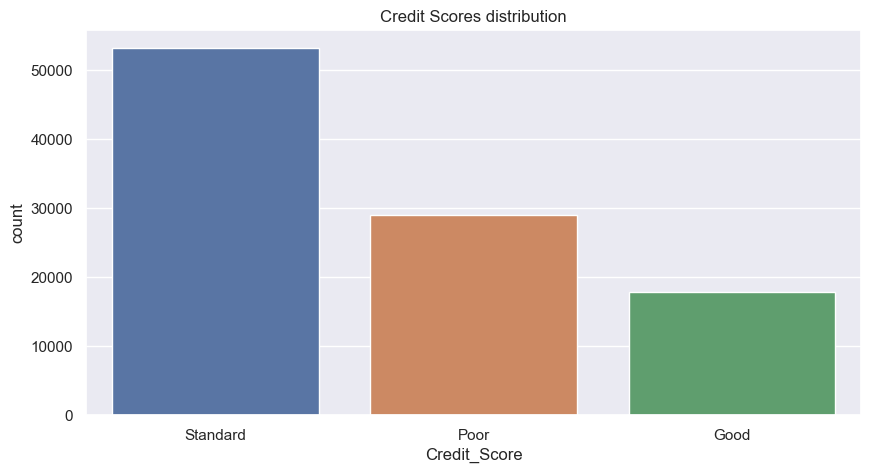

In [16]:
sns.set()

plt.figure(figsize=(10, 5))
sns.countplot(x=cat_data['Credit_Score'], order=cat_data['Credit_Score'].value_counts().index)
plt.title("Credit Scores distribution")
plt.show()

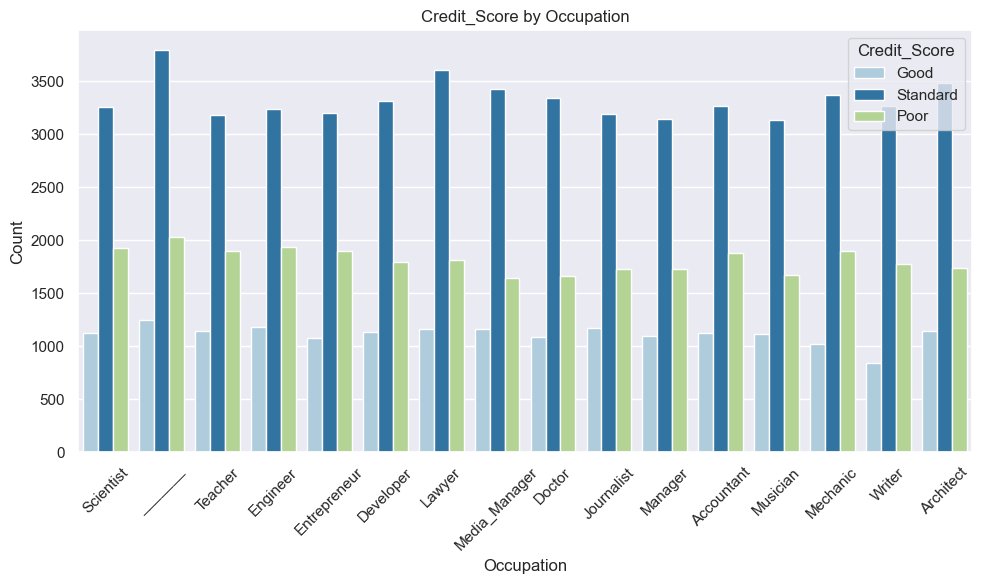

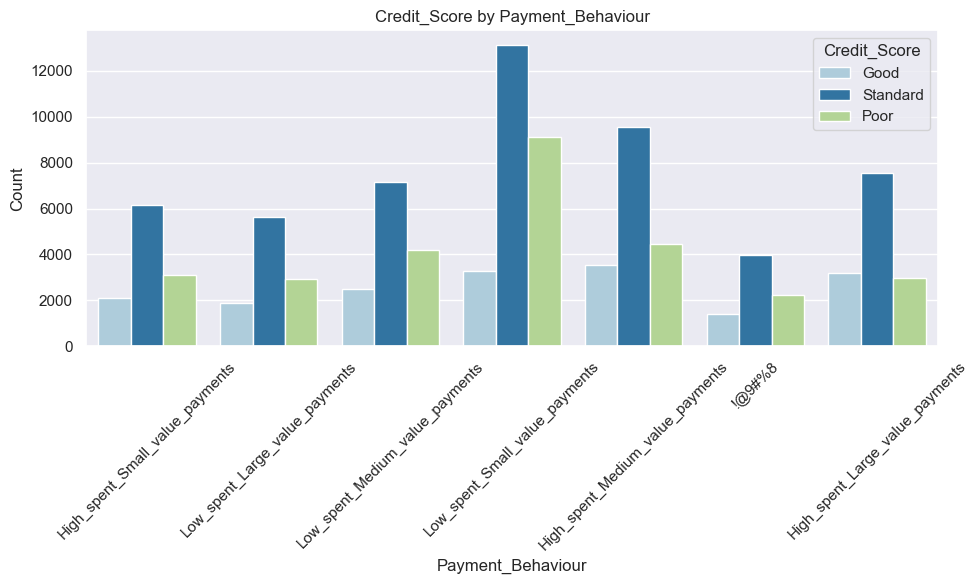

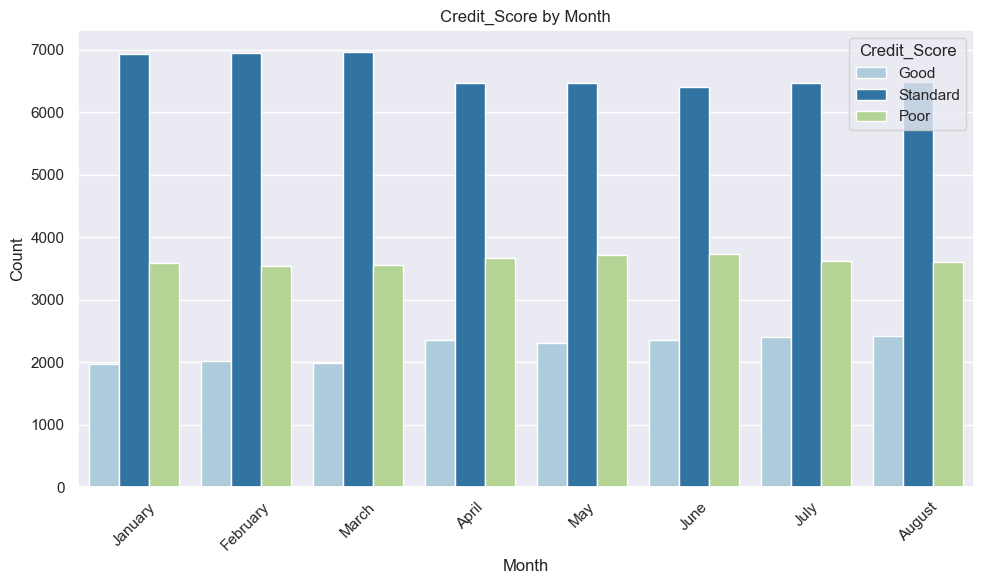

In [17]:
col_list= ["Occupation", "Payment_Behaviour", "Month"]
for col in col_list:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Credit_Score', data=data,palette='Paired' )
    plt.title(f'Credit_Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.legend(title="Credit_Score")
    plt.tight_layout()
    plt.show()

In [18]:
data = data[data['Occupation'] != '_______']

In [19]:
data = data[data['Payment_Behaviour'] != '!@9#%8']

In [20]:
pd.DataFrame(data['Credit_Score'].groupby(data['Occupation']).count())

,Credit_Score
Occupation,
Accountant,5790
Architect,5894
Developer,5729
Doctor,5620
Engineer,5867
Entrepreneur,5741
Journalist,5624
Lawyer,6079
Manager,5513


In [21]:
pd.DataFrame(data['Occupation'].groupby(data['Credit_Score']).count())

,Occupation
Credit_Score,
Good,15293
Poor,24893
Standard,45666


In [22]:

data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      23720
High_spent_Medium_value_payments    16301
Low_spent_Medium_value_payments     12882
High_spent_Large_value_payments     12767
High_spent_Small_value_payments     10524
Low_spent_Large_value_payments       9658
Name: Payment_Behaviour, dtype: int64

In [23]:
pd.DataFrame(data['Credit_Score'].groupby(data['Type_of_Loan']).count())

,Credit_Score
Type_of_Loan,
Auto Loan,992
"Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan",6
"Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan",6
"Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan",7
"Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan",7
...,...
"Student Loan, and Mortgage Loan",161
"Student Loan, and Not Specified",138
"Student Loan, and Payday Loan",213


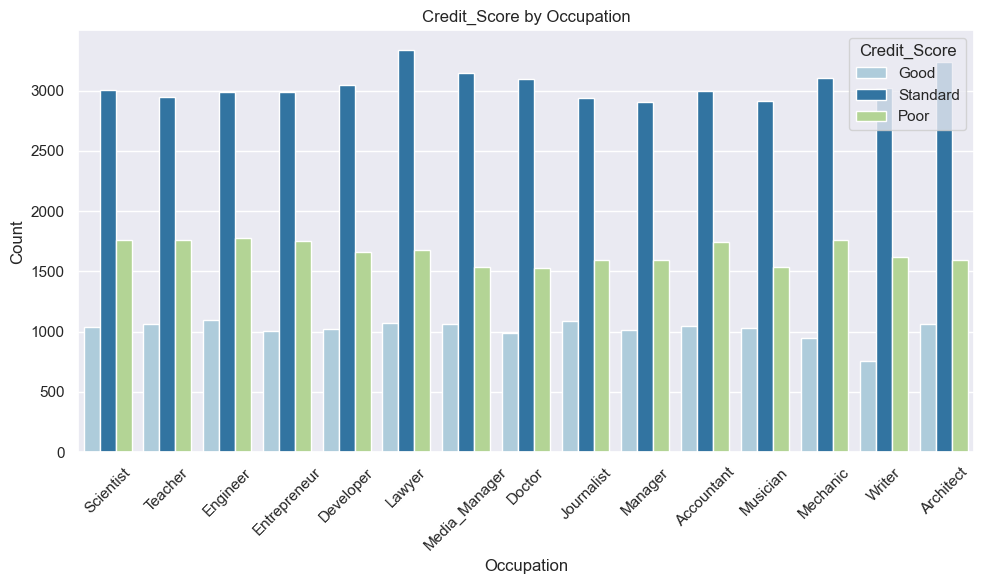

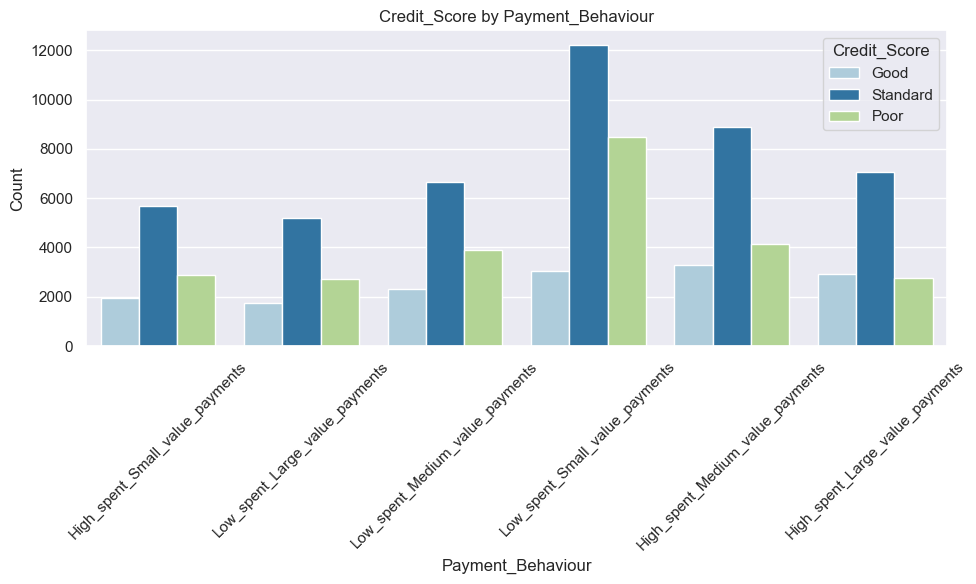

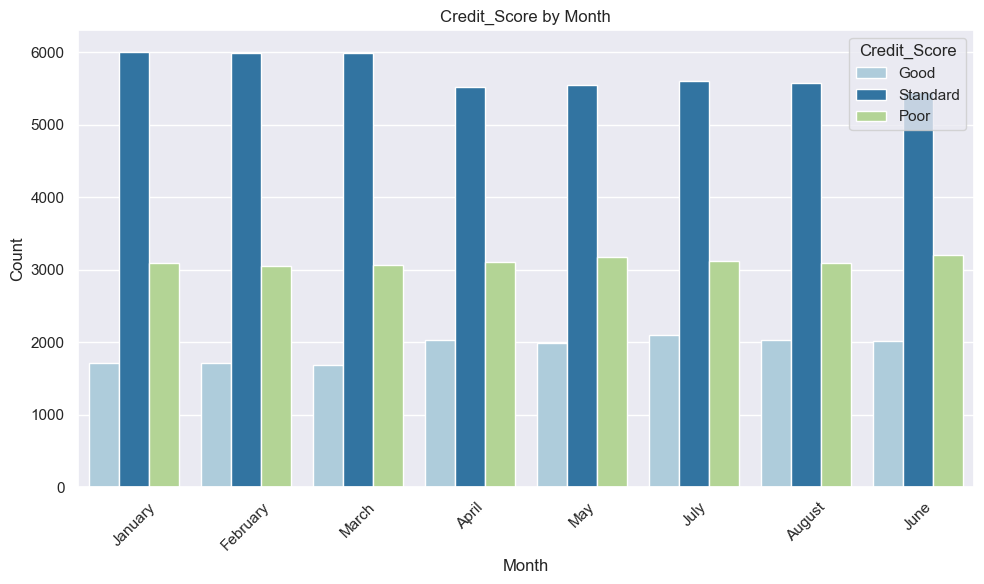

In [24]:
col_list= ["Occupation", "Payment_Behaviour", "Month"]
for col in col_list:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Credit_Score', data=data,palette='Paired' )
    plt.title(f'Credit_Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.legend(title="Credit_Score")
    plt.tight_layout()
    plt.show()

In [25]:
num_data = data.select_dtypes(include=['number','float'])
cat_data = data.select_dtypes(include=['object'])

In [26]:

data['Monthly_Balance'].value_counts()

3.333333e+26    8
3.124941e+02    1
1.968538e+01    1
2.849071e+02    1
2.571577e+02    1
               ..
3.549493e+02    1
3.161133e+02    1
3.518001e+02    1
3.185400e+02    1
3.191650e+02    1
Name: Monthly_Balance, Length: 84807, dtype: int64

In [27]:

data['Age'].value_counts()

38.0      2431
26.0      2430
28.0      2412
31.0      2412
25.0      2358
          ... 
7549.0       1
3119.0       1
4194.0       1
8081.0       1
1342.0       1
Name: Age, Length: 1449, dtype: int64

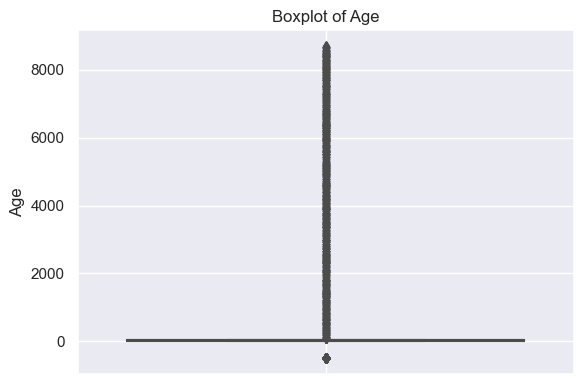

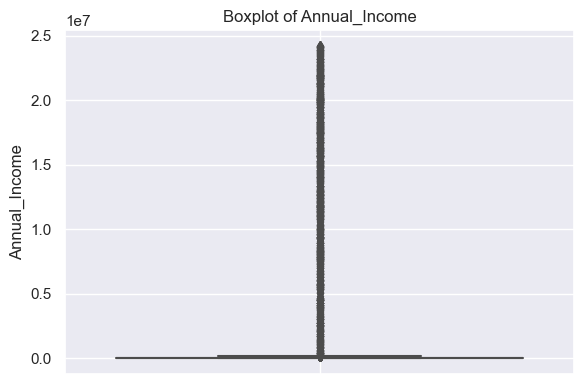

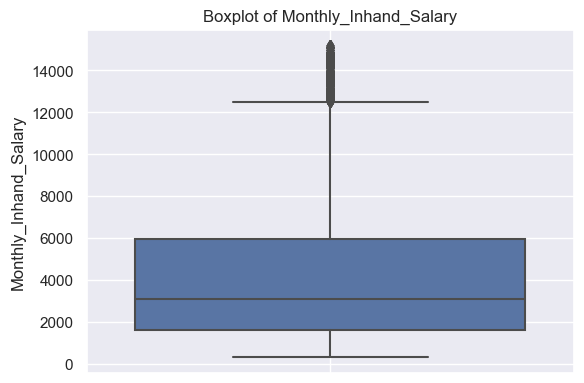

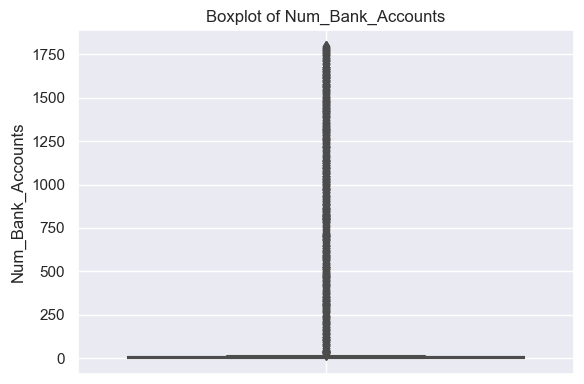

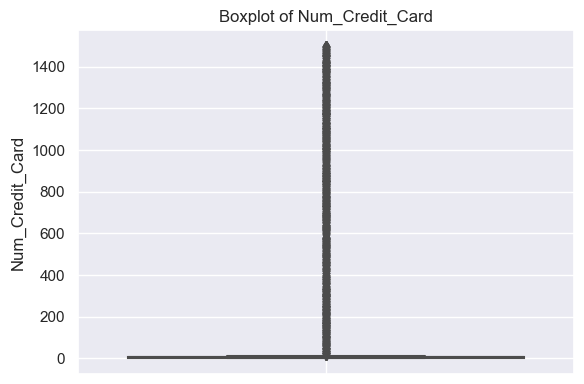

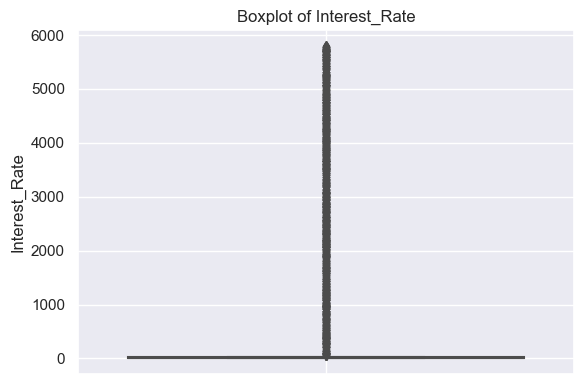

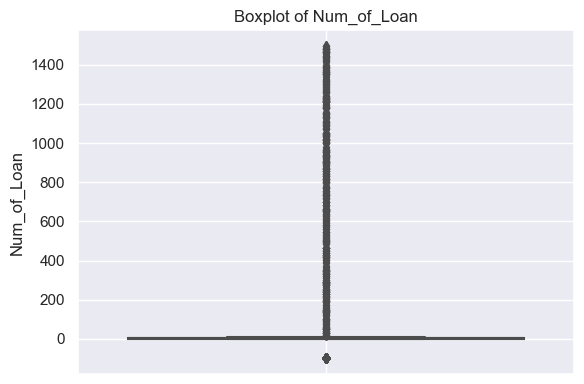

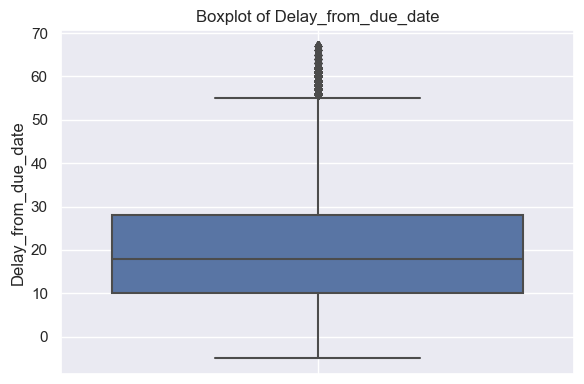

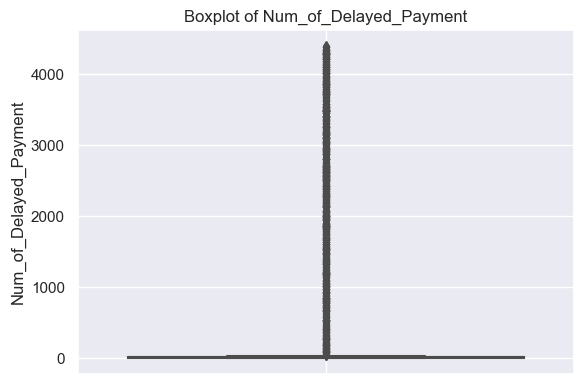

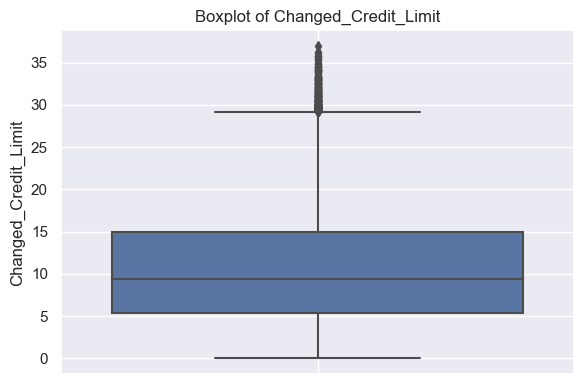

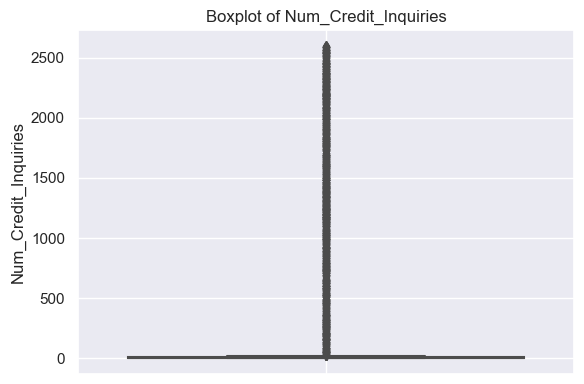

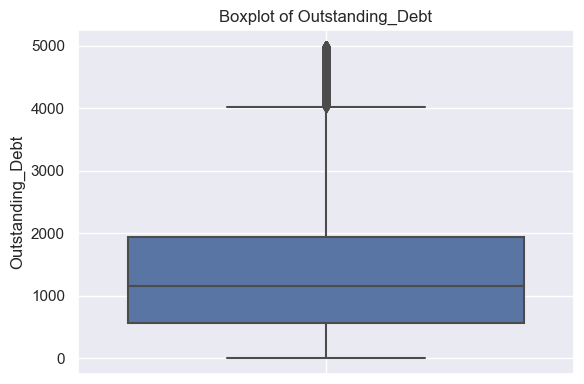

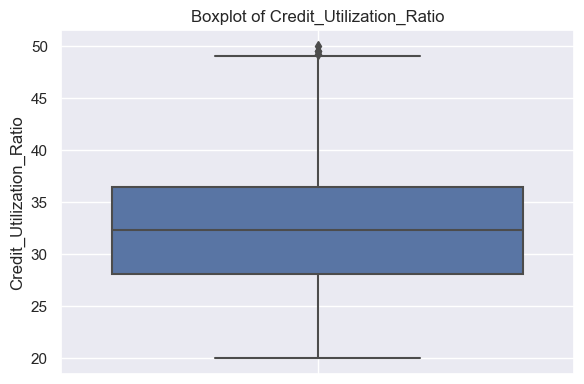

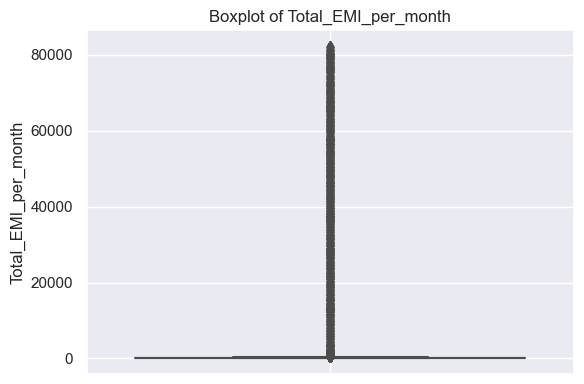

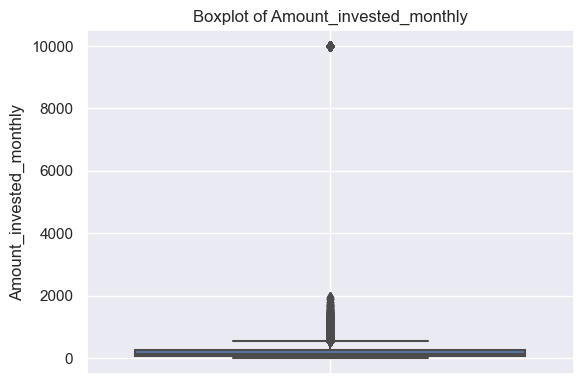

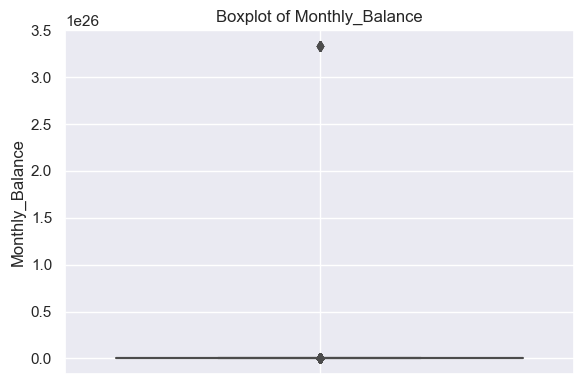

In [28]:
# Plot each numerical column in a separate boxplot
for column in num_data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=num_data[column])
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [29]:
# Make a copy to preserve the original data
df_no_outliers = data.copy()


# Loop through each numerical column to remove outliers
for col in num_data:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only rows within the bounds
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]


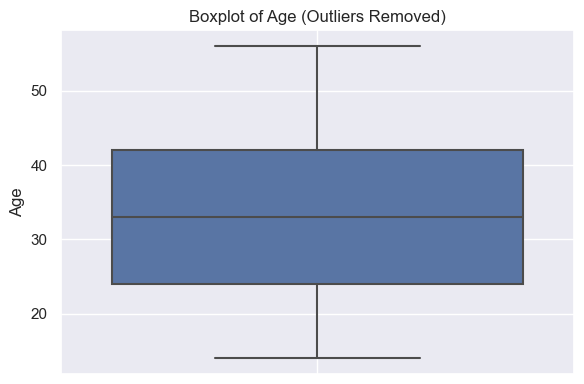

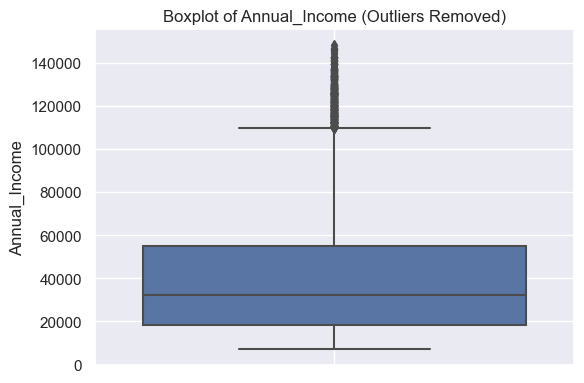

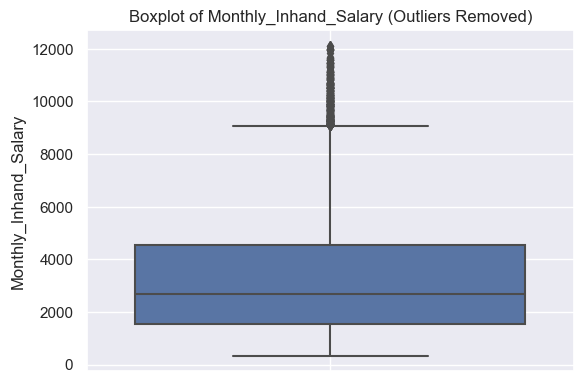

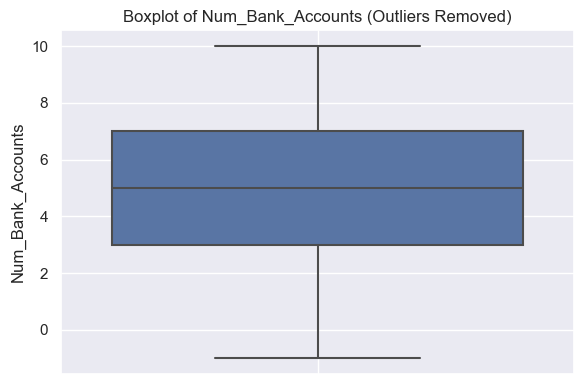

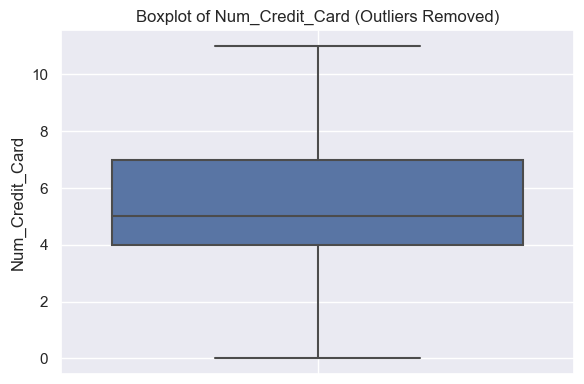

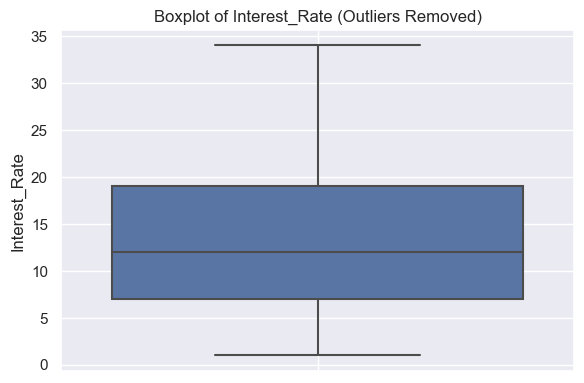

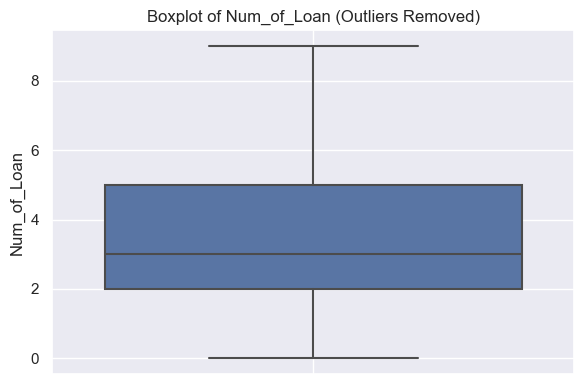

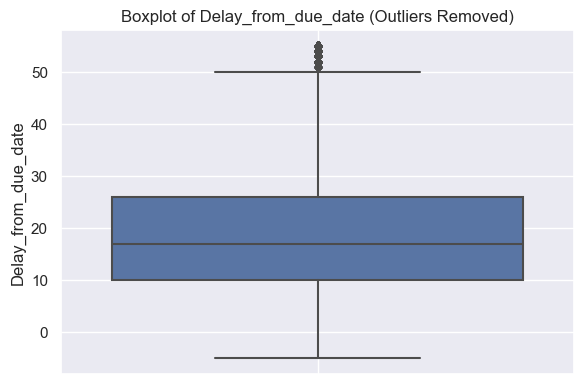

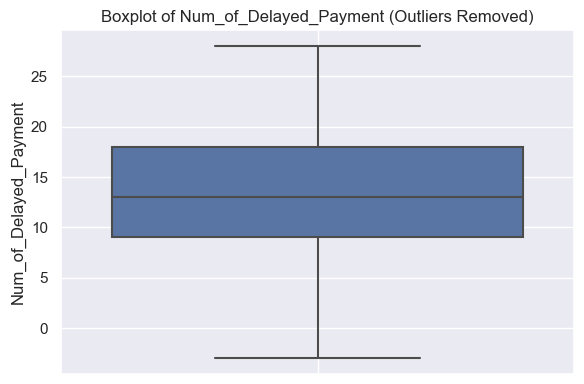

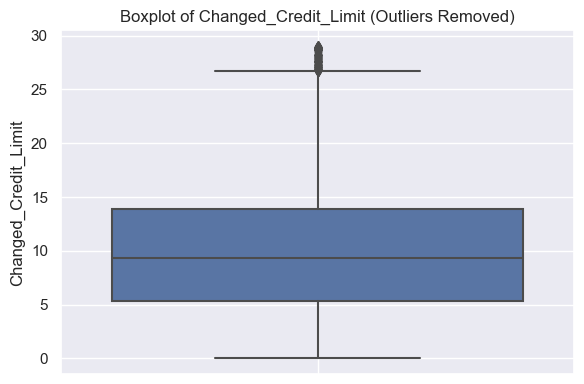

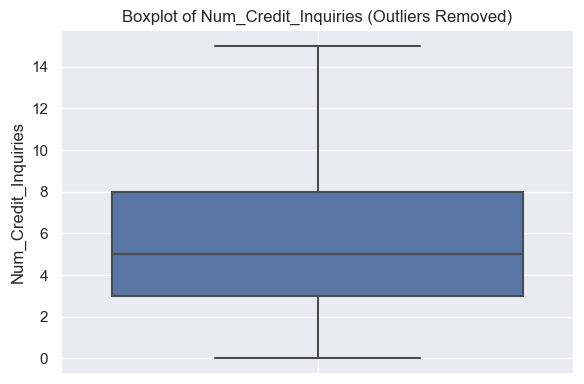

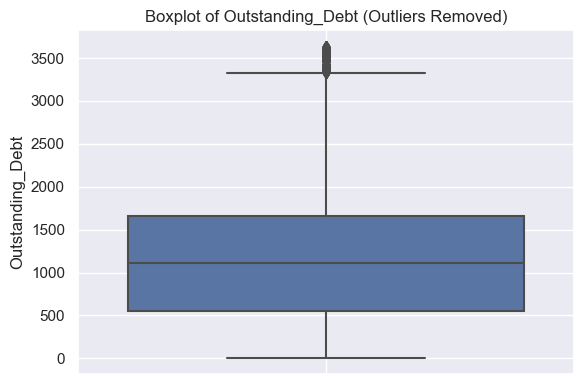

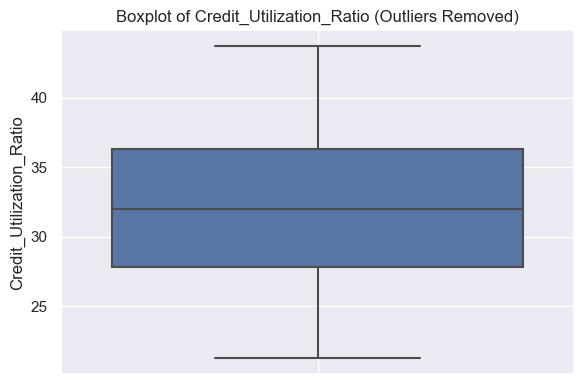

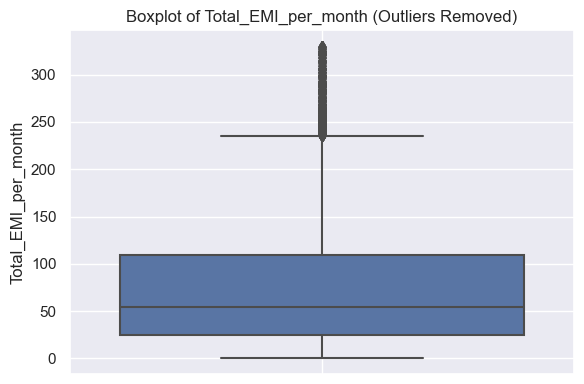

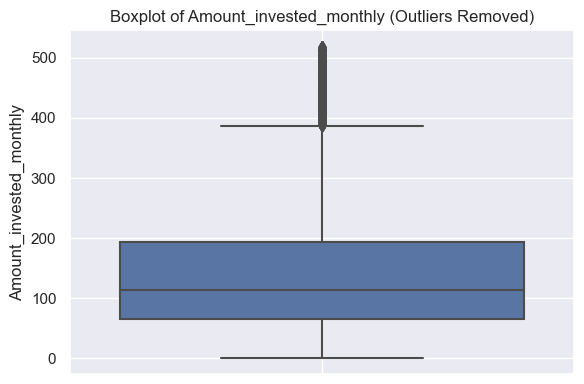

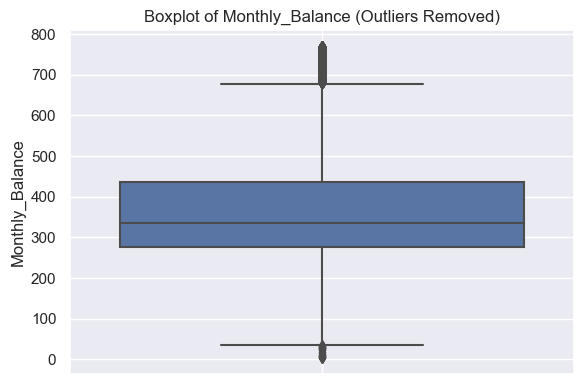

In [30]:
#  Plot no outliers 
for column in df_no_outliers.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'Boxplot of {column} (Outliers Removed)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [31]:
df_no_outliers.isnull().sum()

Month                          0
Name                        3097
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                3269
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2869
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [32]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30941 entries, 0 to 99996
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     30941 non-null  object 
 1   Name                      27844 non-null  object 
 2   Age                       30941 non-null  float64
 3   SSN                       30941 non-null  object 
 4   Occupation                30941 non-null  object 
 5   Annual_Income             30941 non-null  float64
 6   Monthly_Inhand_Salary     30941 non-null  float64
 7   Num_Bank_Accounts         30941 non-null  int64  
 8   Num_Credit_Card           30941 non-null  int64  
 9   Interest_Rate             30941 non-null  int64  
 10  Num_of_Loan               30941 non-null  float64
 11  Type_of_Loan              27672 non-null  object 
 12  Delay_from_due_date       30941 non-null  int64  
 13  Num_of_Delayed_Payment    30941 non-null  float64
 14  Change

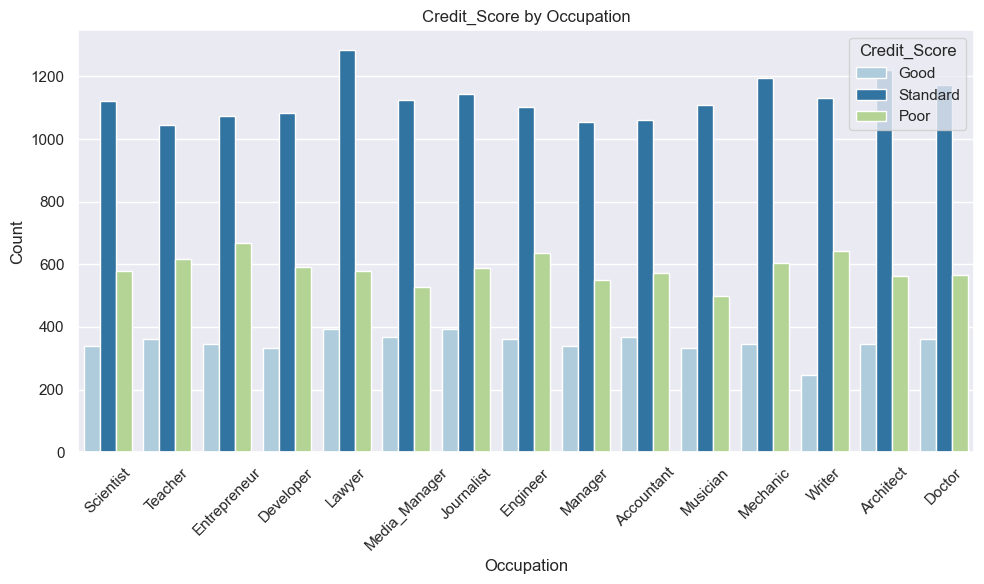

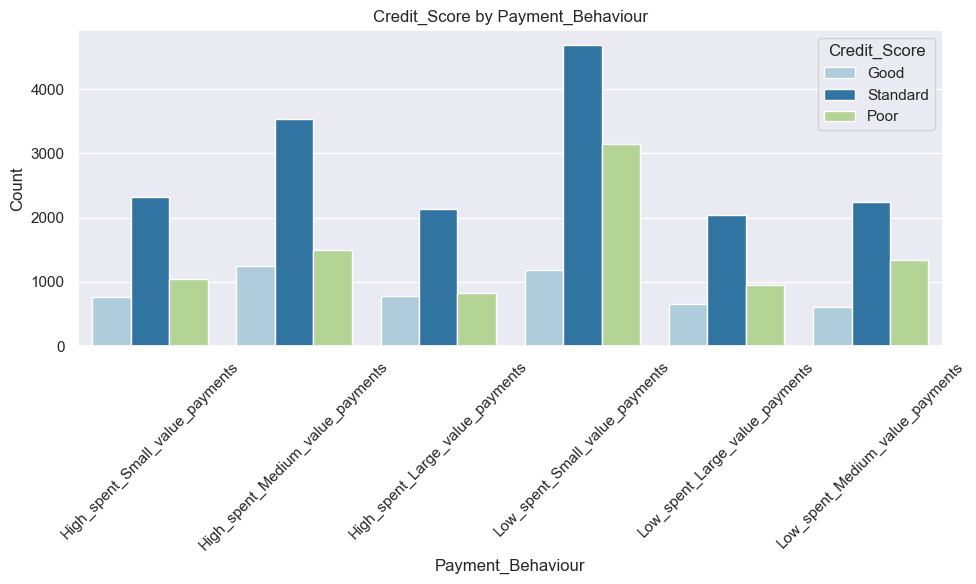

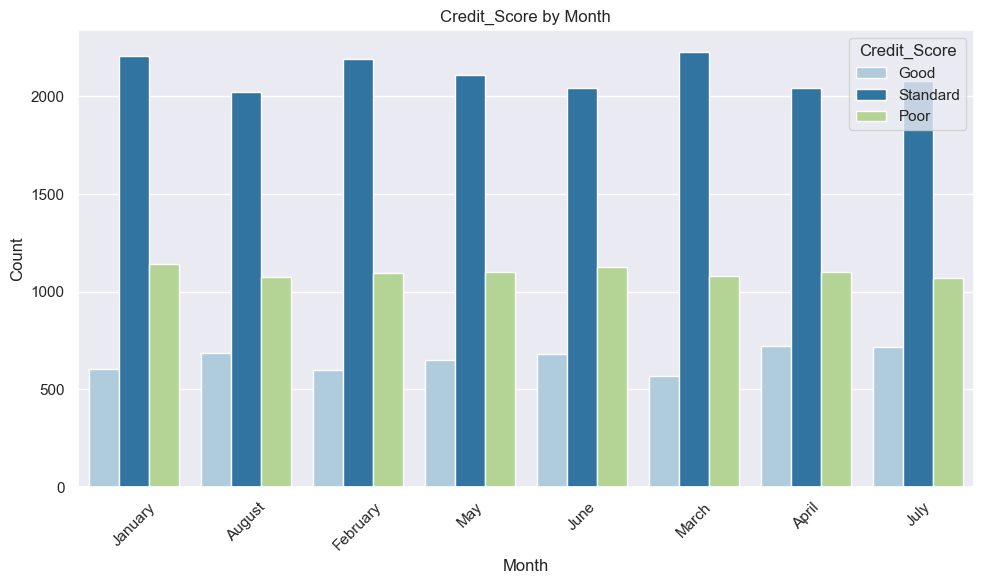

In [33]:
col_list= ["Occupation", "Payment_Behaviour", "Month"]
for col in col_list:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Credit_Score', data=df_no_outliers,palette='Paired' )
    plt.title(f'Credit_Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.legend(title="Credit_Score")
    plt.tight_layout()
    plt.show()

In [34]:

df_no_outliers.drop(columns=['Name','SSN','Month','Type_of_Loan'], inplace=True)

In [35]:
# Drop all rows with missing values
df_cleaned = df_no_outliers.dropna()

In [36]:
df_cleaned.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [37]:
df_cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000
mean,33.442754,38743.657058,3227.110119,5.265567,5.411941,14.027964,3.338131,19.165396,13.042997,9.995342,5.555037,1216.665092,32.072407,77.797480,146.661339,369.131404
std,10.878602,25667.159572,2141.485064,2.493961,1.978117,8.371476,2.226276,12.477970,6.008671,5.924222,3.678975,839.882223,5.000888,72.533442,109.477771,136.042877
min,14.000000,7005.930000,332.128333,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,0.230000,21.264254,0.000000,0.000000,2.478352
25%,24.000000,18283.910000,1544.142500,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.400000,3.000000,552.500000,27.881234,25.160271,65.979225,276.031717
50%,33.000000,32187.360000,2679.048333,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,9.340000,5.000000,1110.630000,32.062909,54.229193,114.027719,334.602800
75%,42.000000,55070.190000,4590.930000,7.000000,7.000000,19.000000,5.000000,26.000000,18.000000,13.960000,8.000000,1657.740000,36.302389,109.765970,194.524651,437.575152
max,56.000000,148306.200000,12123.850000,10.000000,11.000000,34.000000,9.000000,55.000000,28.000000,29.040000,15.000000,3640.400000,43.571488,330.285917,519.584826,770.591167


In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28072 entries, 0 to 99996
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       28072 non-null  float64
 1   Occupation                28072 non-null  object 
 2   Annual_Income             28072 non-null  float64
 3   Monthly_Inhand_Salary     28072 non-null  float64
 4   Num_Bank_Accounts         28072 non-null  int64  
 5   Num_Credit_Card           28072 non-null  int64  
 6   Interest_Rate             28072 non-null  int64  
 7   Num_of_Loan               28072 non-null  float64
 8   Delay_from_due_date       28072 non-null  int64  
 9   Num_of_Delayed_Payment    28072 non-null  float64
 10  Changed_Credit_Limit      28072 non-null  float64
 11  Num_Credit_Inquiries      28072 non-null  float64
 12  Credit_Mix                28072 non-null  object 
 13  Outstanding_Debt          28072 non-null  float64
 14  Credit

In [39]:

df_cleaned['Payment_of_Min_Amount'].value_counts()

Yes    14734
No     10005
NM      3333
Name: Payment_of_Min_Amount, dtype: int64

In [40]:
# Define the mapping
Payment_of_Min_Amount_map = {
    'Yes': 1,
    'No': 0,
    'NM': -1,
}

# Apply and overwrite the column
df_cleaned = df_cleaned.copy()

df_cleaned['Payment_of_Min_Amount'] = df_cleaned['Payment_of_Min_Amount'].map(Payment_of_Min_Amount_map)

df_cleaned['Payment_of_Min_Amount'].value_counts()

 1    14734
 0    10005
-1     3333
Name: Payment_of_Min_Amount, dtype: int64

In [41]:

df_cleaned['Credit_Mix'].value_counts()

Standard    11960
Good         6601
_            5696
Bad          3815
Name: Credit_Mix, dtype: int64

In [42]:
# Define the mapping
credit_mix_map = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2,
    '_': -1
}

# Apply and overwrite the column
df_cleaned = df_cleaned.copy()
df_cleaned['Credit_Mix'] = df_cleaned['Credit_Mix'].map(credit_mix_map)

df_cleaned['Credit_Mix'].value_counts()

 1    11960
 2     6601
-1     5696
 0     3815
Name: Credit_Mix, dtype: int64

In [43]:

df_cleaned['Credit_History_Age'].value_counts()

18 Years and 4 Months     168
19 Years and 9 Months     160
18 Years and 10 Months    157
17 Years and 11 Months    156
19 Years and 11 Months    155
                         ... 
0 Years and 4 Months        5
0 Years and 7 Months        5
33 Years and 7 Months       5
4 Years and 0 Months        4
0 Years and 2 Months        3
Name: Credit_History_Age, Length: 403, dtype: int64

In [44]:
import re

def credit_age_to_years(value):
    match = re.match(r'(\d+)\s+Years?\s+and\s+(\d+)\s+Months?', value)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years + months / 12
    else:
        return None

df_cleaned.loc[:, 'Credit_History_Age'] = df_cleaned['Credit_History_Age'].apply(credit_age_to_years)


df_cleaned['Credit_History_Age'].value_counts()

/var/folders/wy/9jmlfhzn7bj4hf4ltxyqmz8c0000gn/T/ipykernel_35482/3744135837.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cleaned.loc[:, 'Credit_History_Age'] = df_cleaned['Credit_History_Age'].apply(credit_age_to_years)


18.333333    168
19.750000    160
18.833333    157
17.916667    156
19.916667    155
            ... 
0.333333       5
0.583333       5
33.583333      5
4.000000       4
0.166667       3
Name: Credit_History_Age, Length: 403, dtype: int64

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28072 entries, 0 to 99996
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       28072 non-null  float64
 1   Occupation                28072 non-null  object 
 2   Annual_Income             28072 non-null  float64
 3   Monthly_Inhand_Salary     28072 non-null  float64
 4   Num_Bank_Accounts         28072 non-null  int64  
 5   Num_Credit_Card           28072 non-null  int64  
 6   Interest_Rate             28072 non-null  int64  
 7   Num_of_Loan               28072 non-null  float64
 8   Delay_from_due_date       28072 non-null  int64  
 9   Num_of_Delayed_Payment    28072 non-null  float64
 10  Changed_Credit_Limit      28072 non-null  float64
 11  Num_Credit_Inquiries      28072 non-null  float64
 12  Credit_Mix                28072 non-null  int64  
 13  Outstanding_Debt          28072 non-null  float64
 14  Credit

In [46]:

df_cleaned['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      8172
High_spent_Medium_value_payments    5693
Low_spent_Medium_value_payments     3803
High_spent_Small_value_payments     3717
High_spent_Large_value_payments     3404
Low_spent_Large_value_payments      3283
Name: Payment_Behaviour, dtype: int64

In [47]:

df_cleaned['Credit_Score'].value_counts()

Standard    15338
Poor         7983
Good         4751
Name: Credit_Score, dtype: int64

In [48]:
nume_data = df_cleaned.select_dtypes(include=['number','float'])


In [49]:

# Preprocessing
X = df_cleaned.drop('Credit_Score', axis=1)  # Target variable

In [50]:
# Copy the original Credit_Score column
y = df_cleaned['Credit_Score'].copy()

# Set seed for reproducibility
np.random.seed(42)

# Get indices for 'Standard'
standard_indices = y[y == 'Standard'].index

# Determine how many should be 0 and 1
n_total = len(standard_indices)
n_zeros = int(n_total * 0.7)
n_ones = n_total - n_zeros

# Randomly choose indices
zeros_indices = np.random.choice(standard_indices, size=n_zeros, replace=False)
ones_indices = standard_indices.difference(zeros_indices)

# Apply the mapping
y.loc[y == 'Poor'] = 0
y.loc[y == 'Good'] = 1
y.loc[zeros_indices] = 0
y.loc[ones_indices] = 1

# Convert to integer type
y = y.astype(int)

# Check the final value counts
print(y.value_counts())

0    18719
1     9353
Name: Credit_Score, dtype: int64


In [51]:
# Convert categorical variables 
cate_data = X.select_dtypes(include=['object', 'category']).columns.tolist()
X = pd.get_dummies(X, columns=cate_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Scale numerical features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train_scaled.shape

(22457, 40)

In [54]:
X_train.dtypes

Age                                                   float64
Annual_Income                                         float64
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
Interest_Rate                                           int64
Num_of_Loan                                           float64
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Credit_Mix                                              int64
Outstanding_Debt                                      float64
Credit_Utilization_Ratio                              float64
Credit_History_Age                                    float64
Payment_of_Min_Amount                                   int64
Total_EM

In [55]:
# ----------------------
# 2. Model Training
# ----------------------
# XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1
)
xgb_model.fit(X_train_scaled, y_train)

# CatBoost Model
cat_model = CatBoostClassifier(
    iterations=100,
    depth=3,
    learning_rate=0.1,
    verbose=0
)
cat_model.fit(X_train_scaled, y_train)

In [56]:
# ----------------------
# 3. Model Evaluation
# ----------------------
def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, probs):.2f}")

print("XGBoost Performance:")
evaluate_model(xgb_model, X_test_scaled, y_test)

print("\nCatBoost Performance:")
evaluate_model(cat_model, X_test_scaled, y_test)

XGBoost Performance:
Accuracy: 0.73
ROC AUC: 0.76

CatBoost Performance:
Accuracy: 0.73
ROC AUC: 0.76



XGBoost SHAP Analysis:


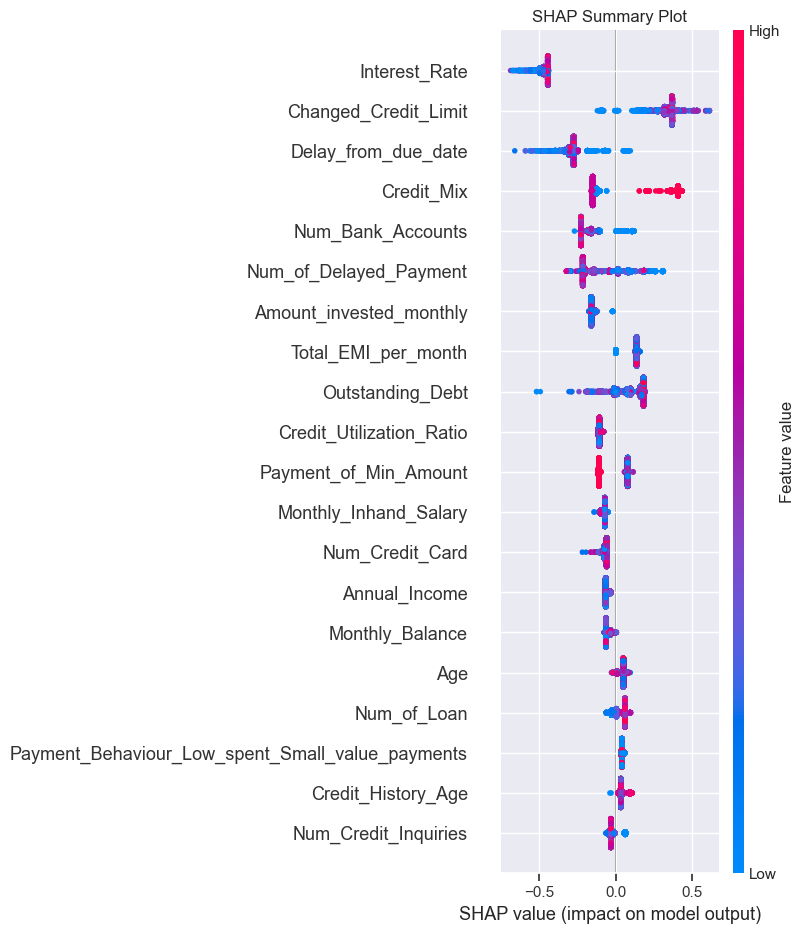

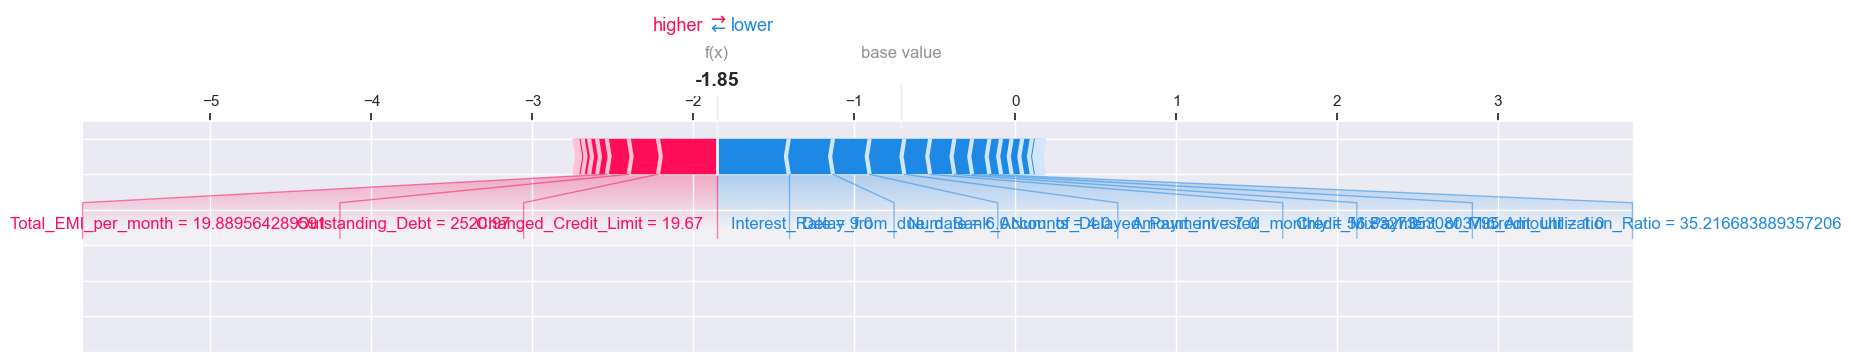


CatBoost SHAP Analysis:


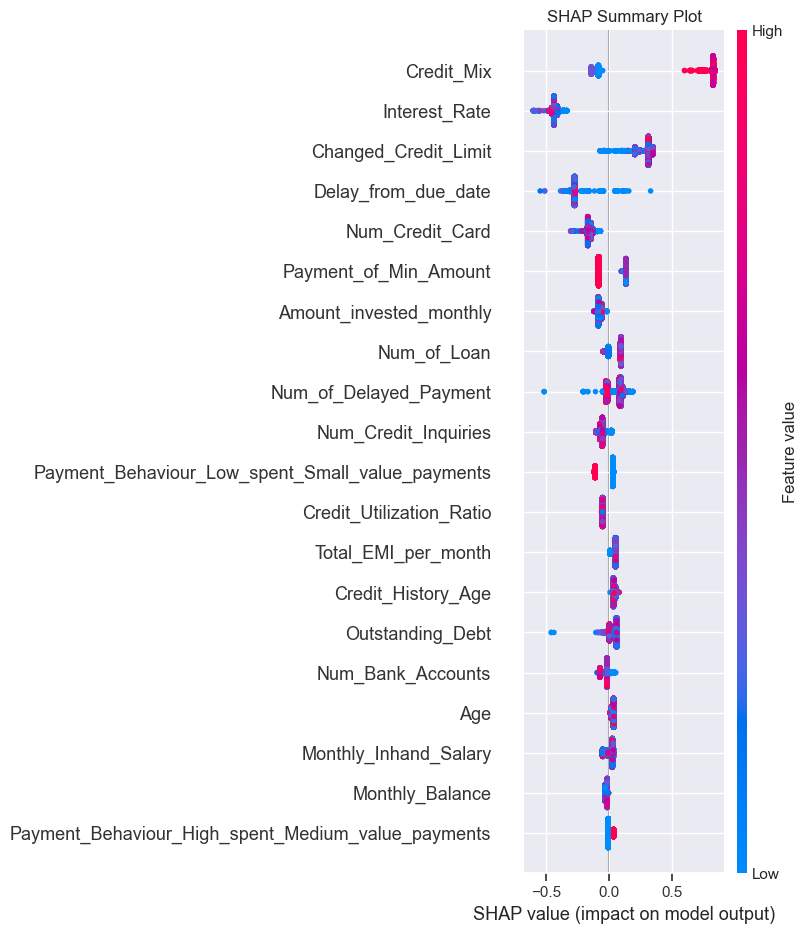

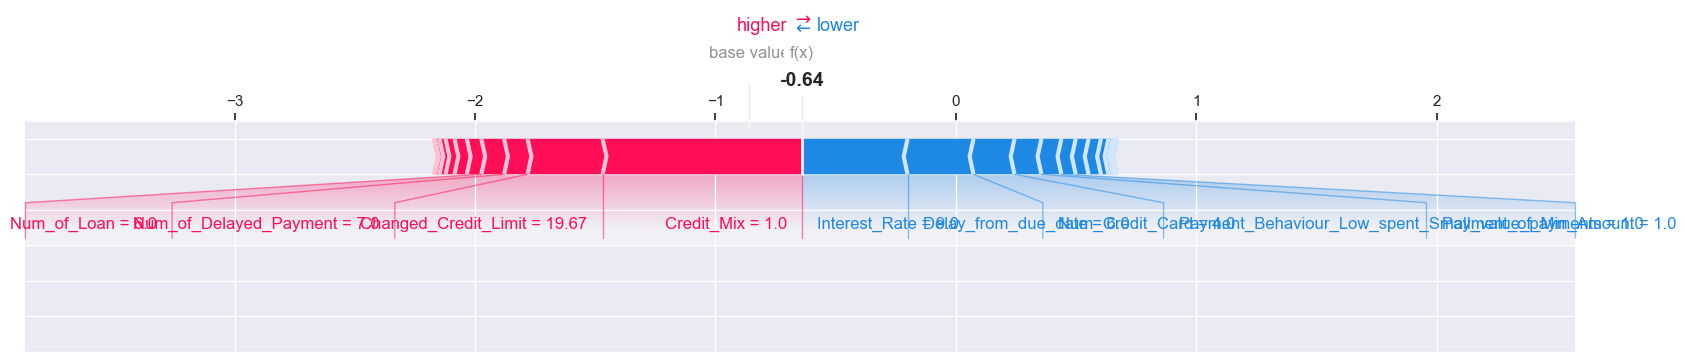

In [57]:

# ----------------------
# 4. Explainability with SHAP
# ----------------------
def shap_analysis(model, X_train, X_test):
    # SHAP Explainer
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # Global feature importance
    plt.title('SHAP Summary Plot')
    shap.summary_plot(shap_values, X_test)
    plt.show()
    
    # Individual prediction explanation
    idx = 0  # Example index
    shap.force_plot(explainer.expected_value, 
                   shap_values[idx,:], 
                   X_test.iloc[idx,:],
                   matplotlib=True)
    plt.show()

print("\nXGBoost SHAP Analysis:")
shap_analysis(xgb_model, X_train, X_test)

print("\nCatBoost SHAP Analysis:")
shap_analysis(cat_model, X_train, X_test)




XGBoost LIME Analysis:


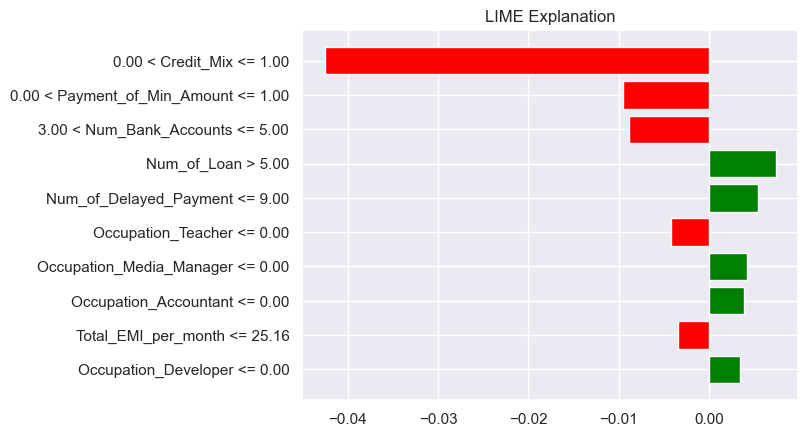


CatBoost LIME Analysis:


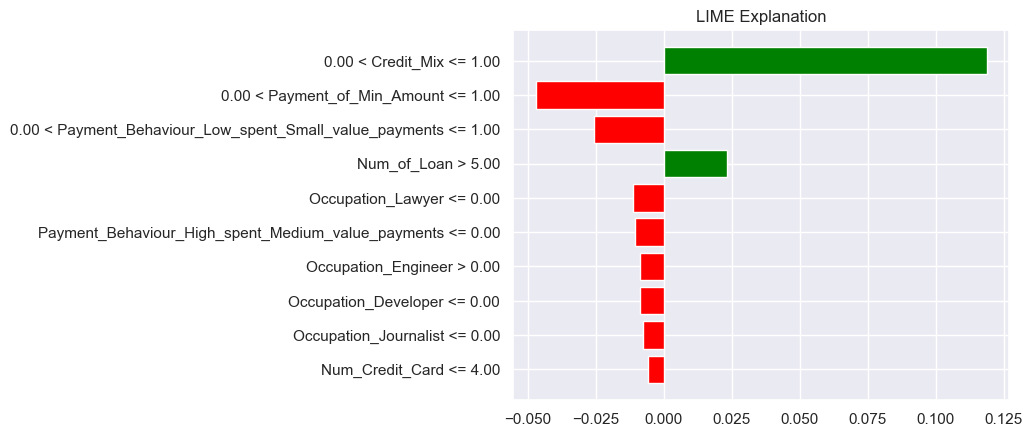

In [58]:
# ----------------------
# 5. Explainability with LIME
# ----------------------
def lime_analysis(model, X_train, X_test):
    explainer = LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=X_train.columns,
        class_names=['Reject', 'Approve'],
        mode='classification'
    )
    
    # Explain individual prediction
    idx = 0  # Example index
    exp = explainer.explain_instance(
        data_row=X_test.iloc[idx], 
        predict_fn=model.predict_proba
    )
    
    # Visualize
    fig = exp.as_pyplot_figure()
    plt.title('LIME Explanation')
    plt.show()

print("\nXGBoost LIME Analysis:")
lime_analysis(xgb_model, X_train, X_test)

print("\nCatBoost LIME Analysis:")
lime_analysis(cat_model, X_train, X_test)


In [59]:
cate_data

['Occupation', 'Payment_Behaviour']

In [60]:
df_cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000,28072.000000
mean,33.442754,38743.657058,3227.110119,5.265567,5.411941,14.027964,3.338131,19.165396,13.042997,9.995342,5.555037,0.693431,1216.665092,32.072407,19.039108,0.406134,77.797480,146.661339,369.131404
std,10.878602,25667.159572,2141.485064,2.493961,1.978117,8.371476,2.226276,12.477970,6.008671,5.924222,3.678975,1.043421,839.882223,5.000888,7.882271,0.691858,72.533442,109.477771,136.042877
min,14.000000,7005.930000,332.128333,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,-1.000000,0.230000,21.264254,0.166667,-1.000000,0.000000,0.000000,2.478352
25%,24.000000,18283.910000,1544.142500,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.400000,3.000000,0.000000,552.500000,27.881234,13.250000,0.000000,25.160271,65.979225,276.031717
50%,33.000000,32187.360000,2679.048333,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,9.340000,5.000000,1.000000,1110.630000,32.062909,18.750000,1.000000,54.229193,114.027719,334.602800
75%,42.000000,55070.190000,4590.930000,7.000000,7.000000,19.000000,5.000000,26.000000,18.000000,13.960000,8.000000,1.000000,1657.740000,36.302389,25.416667,1.000000,109.765970,194.524651,437.575152
max,56.000000,148306.200000,12123.850000,10.000000,11.000000,34.000000,9.000000,55.000000,28.000000,29.040000,15.000000,2.000000,3640.400000,43.571488,33.666667,1.000000,330.285917,519.584826,770.591167


## Final: Save the Trained Model

In [62]:
# ----------------------
# 6. Streamlit app
# ----------------------

import joblib

# Save XGBoost model
joblib.dump(xgb_model, 'xgb_mode_loan.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler_loan.pkl')

# Save the feature names after training preprocessing
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']